1.Load the experiment data

In [27]:
from sklearn.datasets import load_svmlight_file
X, y = load_svmlight_file("australian_scale")
print(X.shape)
print(y.shape)

(690, 14)
(690,)


2.Divide dataset

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
y=y.reshape(690,1)
X_train, X_validation, y_train, y_validation = train_test_split(X, y ,test_size = 1/3.,random_state = 0)

3.Initialize SVM model parameters

In [29]:
w=np.ones(14)
w=w.reshape(14,1)
alpha=0.01
num_iters=150

4.Choose loss function and derivation

In [30]:
def hinge_loss(w,X,y):
    J,grad = 0,0
    fit,y0=0,0
    for j in range(X.shape[0]):
        v = y[j]*((w.T).dot(X[j].todense().T)[0,0])
        J += max(0,1-v)
        grad += 0 if v > 1 else -y[j]*X[j].todense()
        y0=1 if ((w.T).dot(X[j].todense().T))[0,0]>=0 else -1
        if y0==y[j]:
            fit+=1
    fit_rate=fit/X.shape[0]
    return (J,grad,fit_rate)

5.Gradient descent

In [31]:
def gradientDescent(X,y,w,alpha=0.0005,num_iters=1500):
    J_history=np.zeros(num_iters)
    J_validation=np.zeros(num_iters)
    fit_train=np.zeros(num_iters)
    fit_validation=np.zeros(num_iters)
    for i in range(num_iters):
        J_history[i],grad0,fit_train[i] = hinge_loss(w,X,y)
        J_validation[i],grad1,fit_validation[i] = hinge_loss(w,X_validation,y_validation)
        w = w-alpha*grad0.T
    return w,J_history,J_validation,fit_validation

6.Graph

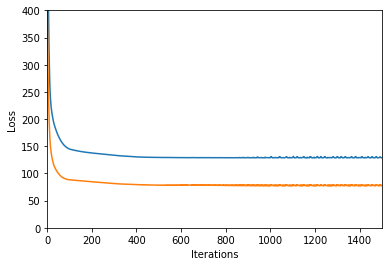

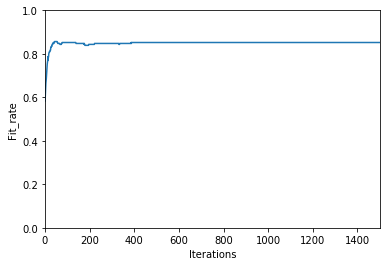

In [32]:
import matplotlib.pyplot as plt
w,L_train,L_validation,F_validation=gradientDescent(X_train,y_train,w)
def P_lossLine(l_train,l_validation):
    plt.xlim(0,1500)
    plt.ylim(0,400)
    plt.plot(l_train)
    plt.plot(l_validation)
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.show()
def P_fitLine(f_validation):
    plt.figure()
    plt.xlim(0,1500)
    plt.ylim(0,1)
    plt.plot(f_validation)
    plt.ylabel('Fit_rate')
    plt.xlabel('Iterations')
    plt.show()
P_lossLine(L_train,L_validation) 
P_fitLine(F_validation)